# 🧪 Wine Quality Prediction: Classifying Good vs Not Good Wine
### Using Logistic Regression and Feature Analysis on White Wine Data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORT DATA FROM CSV FILE

In [3]:

white=pd.read_csv("/content/winequality-white.csv",sep=";")


## 📄 Preview of the White Wine Dataset
The first 5 rows of the dataset using `white.head()`:


In [4]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## 🔍 Last 5 Rows of the Dataset
Displayed using `white.tail()` to inspect the end of the dataset.


In [5]:
white.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


## 📊 Statistical Summary of the Dataset
Using `white.describe()` to view basic statistics for each numeric column (mean, std, min, max, quartiles).




In [6]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## ❓ Missing Values Check
Using `white.isnull().sum()` to identify columns with null or missing data.


In [7]:
white.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


## 🧾 First 5 Rows of the Dataset
Previewing the first few entries using `white.head()` to understand the structure and sample data.


In [8]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## 🔗 Correlation Matrix
The correlation matrix helps identify relationships between numeric features. Positive values indicate direct relationships, while negative values show inverse relationships.


In [9]:
j=white.corr()
j

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


## 📌 Heatmap of Feature Correlations
Visualizing the correlation matrix using a heatmap to better understand the relationships between variables. Darker colors represent stronger correlations.




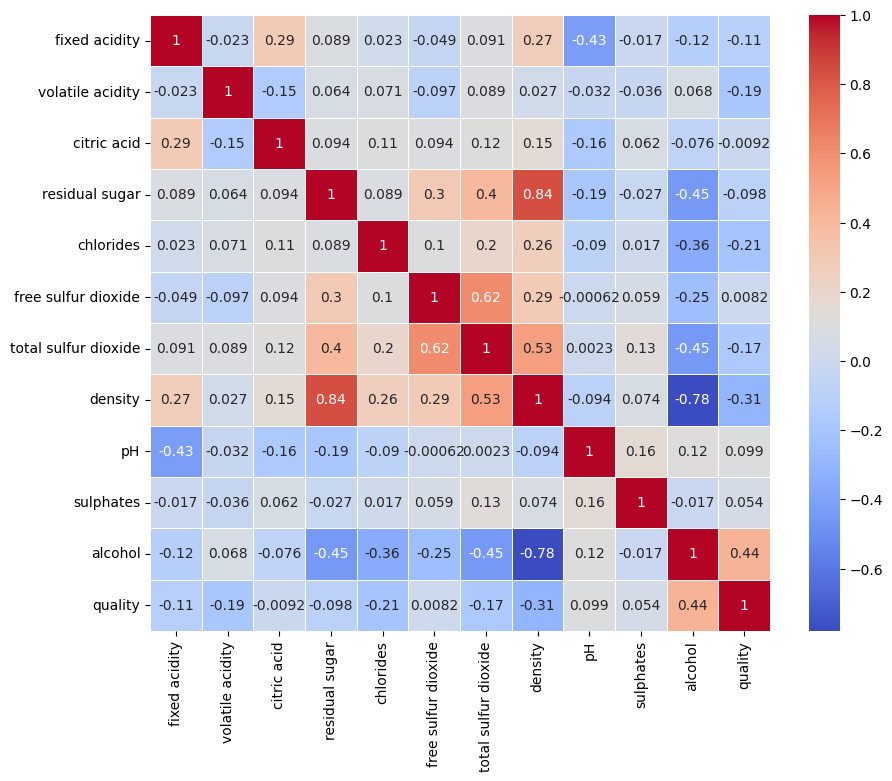

In [10]:


plt.figure(figsize=(10, 8))
sns.heatmap(j, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()


## 🎯 Correlation with Wine Quality
Sorting features by their correlation with the `quality` column to identify which ones are most relevant for predicting wine quality.


In [11]:


# Sort correlations with respect to 'quality'
quality_corr = j['quality'].sort_values(ascending=False)
print(quality_corr)


quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64


## 🚫 Dropping Columns with Low Correlation to Quality
We drop features with weak correlations to the target variable `quality` to improve model performance and reduce noise. The following columns are removed:
- `free sulfur dioxide`
- `citric acid`
- `residual sugar`
- `pH`
- `sulphates`
- `fixed acidity`


In [12]:
low_corr_columns = [
    'free sulfur dioxide',
    'citric acid',
    'residual sugar',
    'pH',
    'sulphates',
    'fixed acidity'
]

white.drop(columns=low_corr_columns, inplace=True)


## 🔄 Correlation Matrix After Dropping Low-Correlation Features
We recalculate the correlation matrix to observe how the remaining features correlate with each other and with the target `quality`.


In [13]:
after=white.corr()
after

,volatile acidity,chlorides,total sulfur dioxide,density,alcohol,quality
volatile acidity,1.000000,0.070512,0.089261,0.027114,0.067718,-0.194723
chlorides,0.070512,1.000000,0.198910,0.257211,-0.360189,-0.209934
total sulfur dioxide,0.089261,0.198910,1.000000,0.529881,-0.448892,-0.174737
density,0.027114,0.257211,0.529881,1.000000,-0.780138,-0.307123
alcohol,0.067718,-0.360189,-0.448892,-0.780138,1.000000,0.435575
quality,-0.194723,-0.209934,-0.174737,-0.307123,0.435575,1.000000


## 📊 Updated Heatmap of Feature Correlations
Visualizing the correlation matrix after removing low-correlation features to observe the relationships between the remaining variables and `quality`.


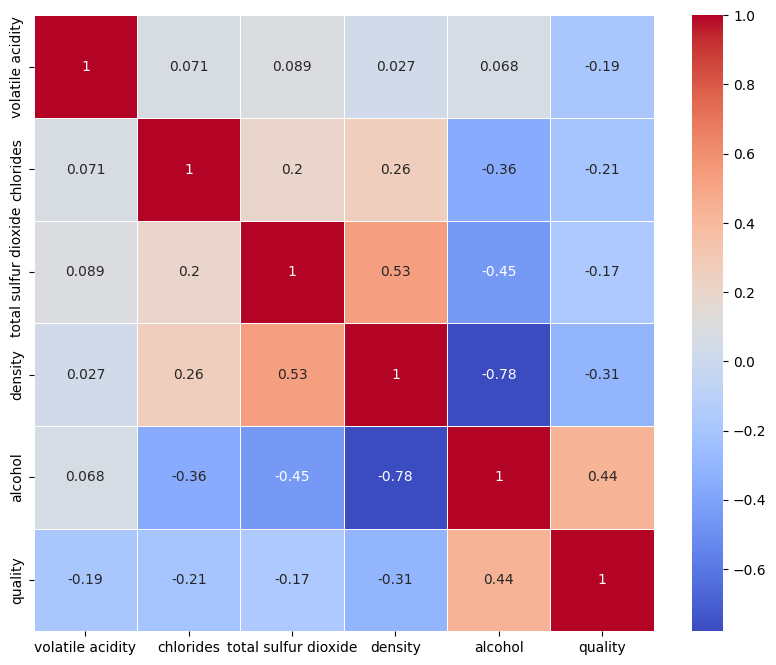

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(after, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()


## 🎯 Sorted Feature Correlations with Quality (Updated)
Sorting the remaining features by their correlation with the `quality` column after removing low-correlation features to identify the most relevant predictors for wine quality.


In [15]:


# Sort correlations with respect to 'quality'
quality_corr = after['quality'].sort_values(ascending=False)
print(quality_corr)


quality                 1.000000
alcohol                 0.435575
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64


## ✅ Selecting Relevant Features for Model Training
Based on the correlation analysis, we select the most relevant features for predicting wine quality. These are:
- `alcohol`
- `density`
- `volatile acidity`
- `chlorides`
- `total sulfur dioxide`
- `quality` (target variable)


In [16]:


# Select useful columns
columns = ['alcohol', 'density', 'volatile acidity', 'chlorides', 'total sulfur dioxide', 'quality']
white_corr = white[columns]



## 📊 Boxplots of Features vs. Wine Quality
We use boxplots to visually inspect how each feature varies across different wine quality levels. This helps identify any potential trends or outliers.


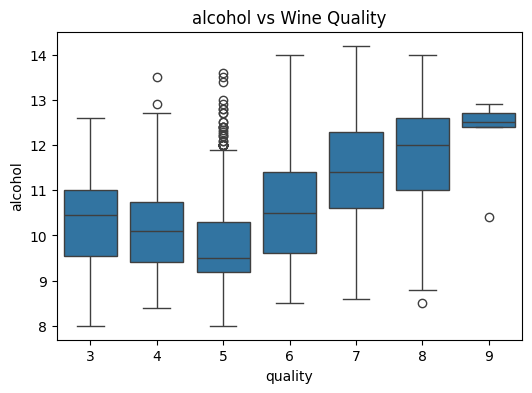

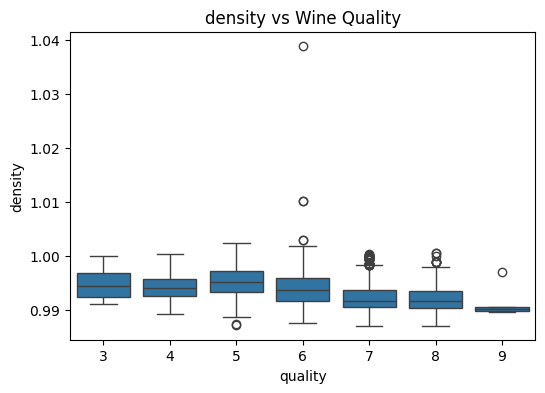

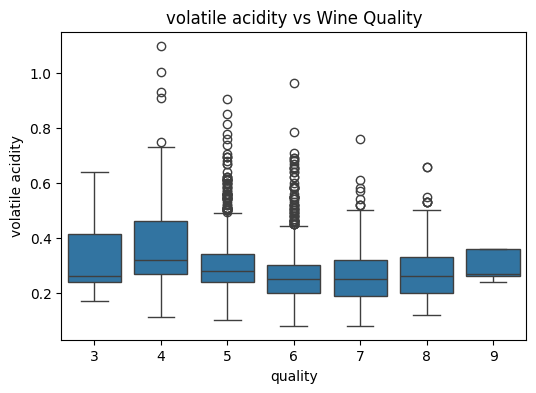

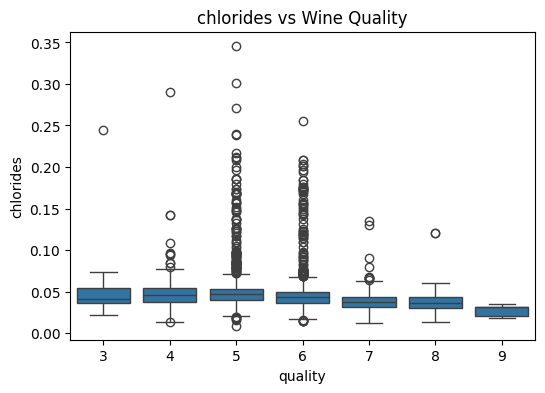

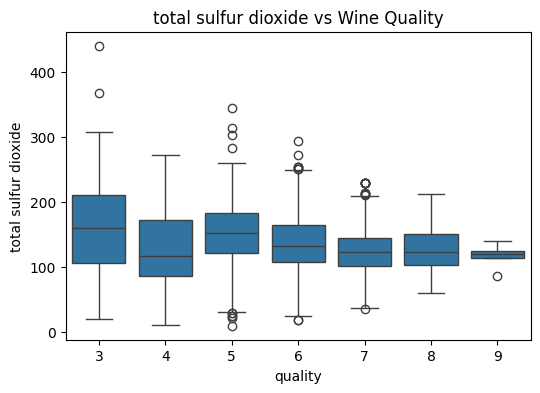

In [17]:
# 2. Boxplots of each feature vs. quality

for col in columns:
    if col != 'quality':
        plt.figure(figsize=(6, 4))
        sns.boxplot(x='quality', y=col, data=white_corr)
        plt.title(f'{col} vs Wine Quality')
        plt.show()


## 🔄 Pairplot of Features vs. Wine Quality
A pairplot helps visualize the relationships between pairs of features, with colors indicating different wine quality levels. This allows us to identify any potential correlations or patterns between features.


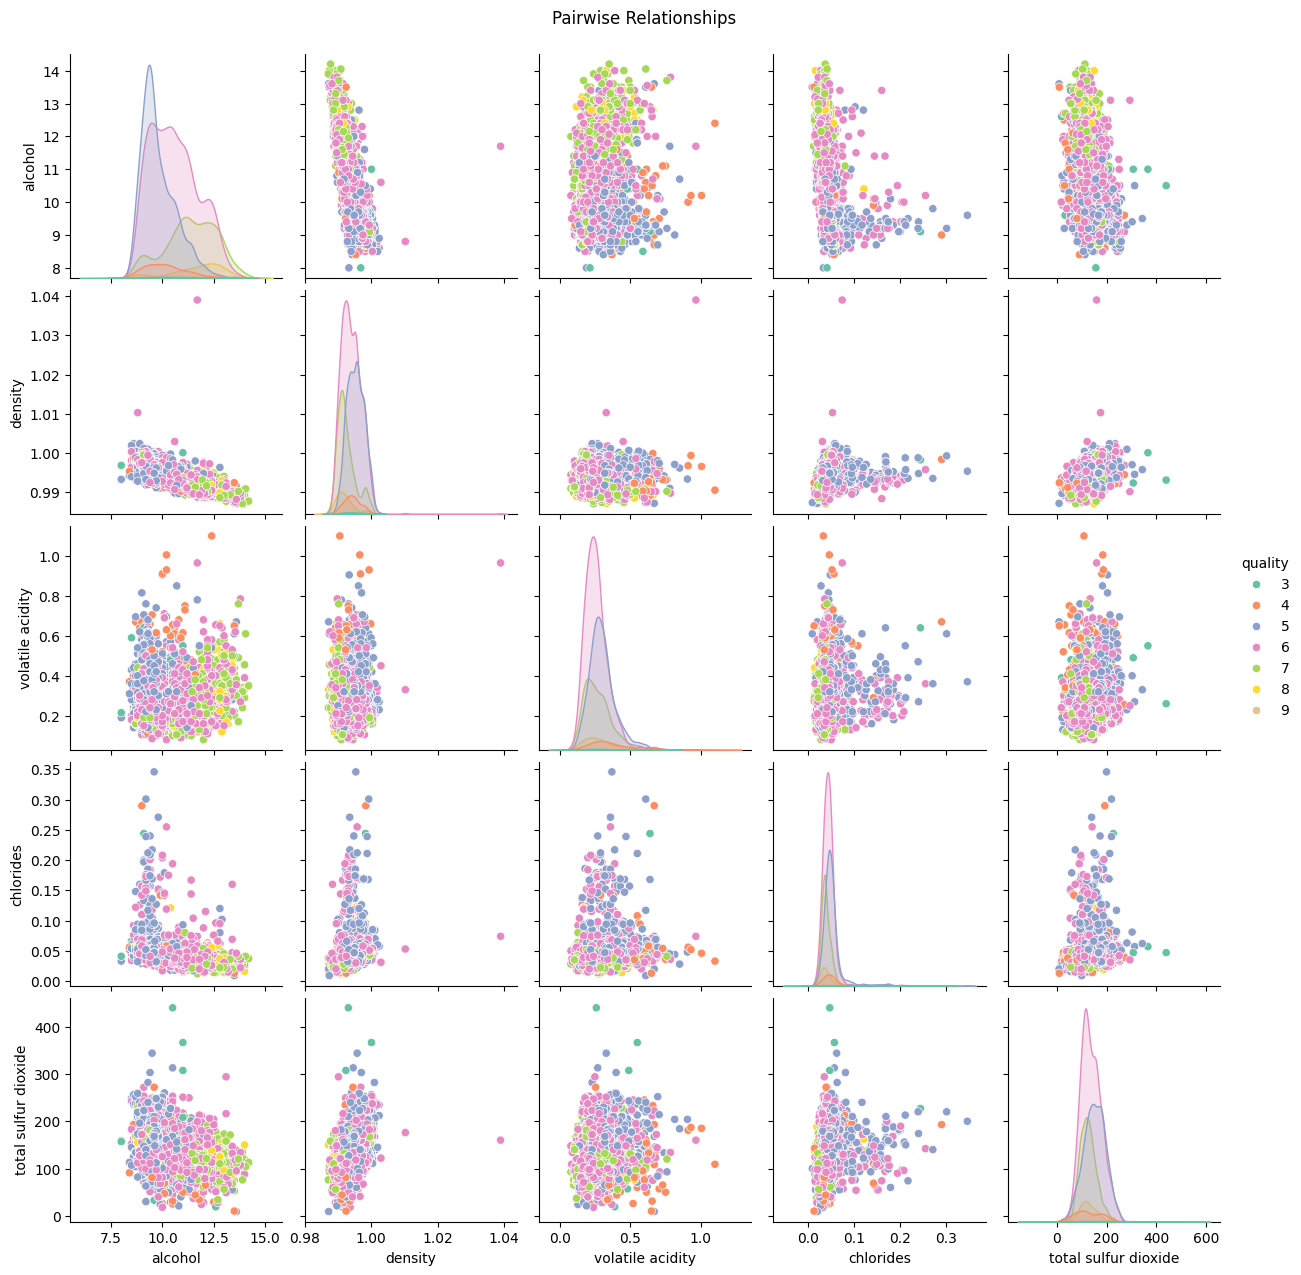

In [18]:
# 3. Pairplot
sns.pairplot(white_corr, hue='quality', diag_kind='kde', palette='Set2')
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

## 📊 Boxplots of All Numeric Features
Visualizing boxplots for all numeric features to check for any outliers and to understand the distribution of values across the dataset.


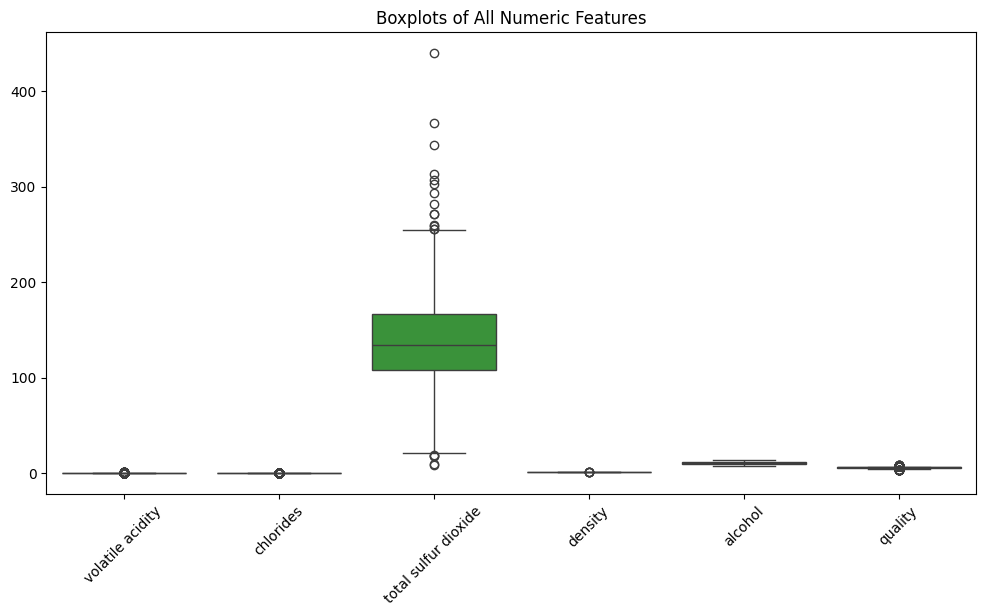

In [19]:


# Only numeric columns
numeric_cols = white.select_dtypes(include=np.number)

# Plot boxplots for all numeric columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_cols)
plt.xticks(rotation=45)
plt.title('Boxplots of All Numeric Features')
plt.show()


## 🧾 Preview of the First 20 Rows of the Dataset
Viewing the first 20 rows to inspect the data and ensure that all preprocessing steps are correctly applied.


In [20]:
white.head(20)

,volatile acidity,chlorides,total sulfur dioxide,density,alcohol,quality
0,0.27,0.045,170.0,1.0010,8.8,6
1,0.30,0.049,132.0,0.9940,9.5,6
2,0.28,0.050,97.0,0.9951,10.1,6
3,0.23,0.058,186.0,0.9956,9.9,6
4,0.23,0.058,186.0,0.9956,9.9,6
5,0.28,0.050,97.0,0.9951,10.1,6
6,0.32,0.045,136.0,0.9949,9.6,6
7,0.27,0.045,170.0,1.0010,8.8,6
8,0.30,0.049,132.0,0.9940,9.5,6
9,0.22,0.044,129.0,0.9938,11.0,6


## 🔖 Creating Binary Quality Labels
We convert the `quality` column into a binary classification by setting:
- **Good wine**: `quality >= 5` → label as 1
- **Not good wine**: `quality < 5` → label as 0


In [21]:
# Create binary label# one good wine 0 bad wine
white['quality_label'] = (white['quality'] >= 5).astype(int)


## 🧾 Preview of the Updated Dataset
After creating the binary quality labels, we can inspect the updated dataset to ensure everything is correct.


In [22]:
white

,volatile acidity,chlorides,total sulfur dioxide,density,alcohol,quality,quality_label
0,0.27,0.045,170.0,1.00100,8.8,6,1
1,0.30,0.049,132.0,0.99400,9.5,6,1
2,0.28,0.050,97.0,0.99510,10.1,6,1
3,0.23,0.058,186.0,0.99560,9.9,6,1
4,0.23,0.058,186.0,0.99560,9.9,6,1
...,...,...,...,...,...,...,...
4893,0.21,0.039,92.0,0.99114,11.2,6,1
4894,0.32,0.047,168.0,0.99490,9.6,5,1
4895,0.24,0.041,111.0,0.99254,9.4,6,1
4896,0.29,0.022,110.0,0.98869,12.8,7,1


## 🧑‍💻 Splitting the Data into Training and Testing Sets
We split the data into **features (X)** and **target (y)**. The dataset is divided into **80% training** and **20% testing** sets to evaluate model performance.


In [23]:
from sklearn.model_selection import train_test_split

# Features (X) and target (y)
features = ['alcohol', 'density', 'volatile acidity', 'chlorides', 'total sulfur dioxide']
X = white[features]
y = white['quality_label']

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 🤖 Training the Logistic Regression Model
We train a logistic regression model using the training data and evaluate its performance on the test set. The evaluation includes the confusion matrix and classification report for precision, recall, F1-score, and accuracy.


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[  0  30]
 [  1 949]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.97      1.00      0.98       950

    accuracy                           0.97       980
   macro avg       0.48      0.50      0.49       980
weighted avg       0.94      0.97      0.95       980



## 📝 Predicting Wine Quality Based on User Input
We allow the user to input values for key features such as alcohol content, density, and acidity. The model then predicts whether the wine is **good** or **not good** based on these inputs.


In [25]:
# Collect input from the user
alcohol = float(input("Enter alcohol content: "))
density = float(input("Enter density: "))
volatile_acidity = float(input("Enter volatile acidity: "))
chlorides = float(input("Enter chlorides: "))
total_sulfur_dioxide = float(input("Enter total sulfur dioxide: "))

# Combine into an array
user_input = np.array([[alcohol, density, volatile_acidity, chlorides, total_sulfur_dioxide]])

# Predict using the trained model
prediction = model.predict(user_input)

# Show result
if prediction[0] == 1:
    print("✅ The wine is predicted to be GOOD.")
else:
    print("❌ The wine is predicted to be NOT GOOD.")


Enter alcohol content: 8.8
Enter density: 1.0010
Enter volatile acidity: 0.27
Enter chlorides: 0.045
Enter total sulfur dioxide: 170
✅ The wine is predicted to be GOOD.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## 📈 Model Accuracy
We evaluate the model’s performance by calculating the accuracy on both the training and test sets. This gives us an understanding of how well the model generalizes to unseen data.


In [26]:
from sklearn.metrics import accuracy_score

# Predict on training data
y_train_pred = model.predict(X_train)

# Predict on test data
y_test_pred = model.predict(X_test)

# Accuracy on train and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"✅ Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"✅ Test Accuracy: {test_accuracy * 100:.2f}%")


✅ Train Accuracy: 96.15%
✅ Test Accuracy: 96.84%
